In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [63]:
df = pd.read_csv('BlackFriday.csv')

## Data Type

In [64]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [65]:
unique_users = len(df.User_ID.unique())
unique_products = len(df.Product_ID.unique())
print('There are {} unique users and {} unique products'.format(unique_users, unique_products))

There are 5891 unique users and 3623 unique products


In [66]:
for col_name in ['Gender', 'Age', 'Occupation', 'City_Category']:
    print(sorted(df[col_name].unique()))

['F', 'M']
['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
['A', 'B', 'C']


In [67]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [68]:
df['Marital_Status'].unique()

array([0, 1])

## Missing Value

In [69]:
for column_name in df.columns:
    missing_value = df[column_name].isnull().sum()
    print(column_name, missing_value)

User_ID 0
Product_ID 0
Gender 0
Age 0
Occupation 0
City_Category 0
Stay_In_Current_City_Years 0
Marital_Status 0
Product_Category_1 0
Product_Category_2 166986
Product_Category_3 373299
Purchase 0


In [70]:
total_rows = len(df)
percent_missing_prod2 = df['Product_Category_2'].isnull().sum()/total_rows
percent_missing_prod3 = df['Product_Category_3'].isnull().sum()/total_rows

print('Total rows:{}\nProd2 Missing:{:.0%}\nProd3 Missing:{:.0%}'.format(total_rows, percent_missing_prod2, percent_missing_prod3))

Total rows:537577
Prod2 Missing:31%
Prod3 Missing:69%


## Data Distribution

In [71]:
for col_name in df.columns:
    print(col_name, len(df[col_name].unique()))

User_ID 5891
Product_ID 3623
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 18
Product_Category_2 18
Product_Category_3 16
Purchase 17959


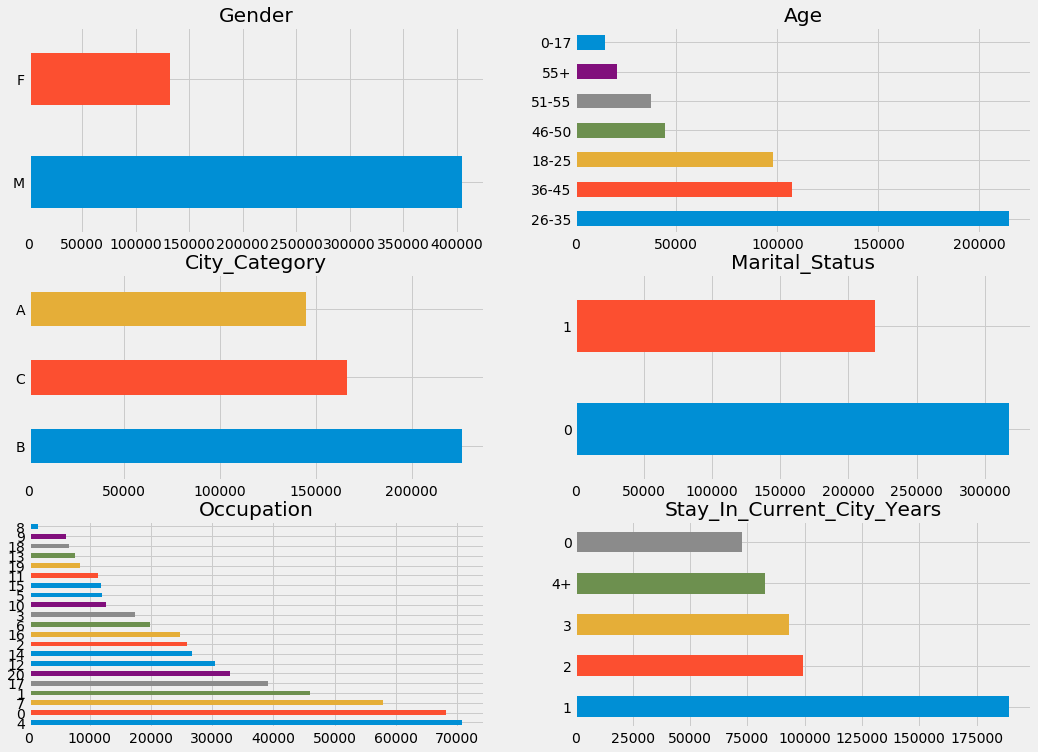

In [72]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[16, 12])

df['Gender'].value_counts().plot(kind='barh', ax=axes[0,0], title='Gender')
df['Age'].value_counts().plot(kind='barh', ax=axes[0,1], title='Age')
df['City_Category'].value_counts().plot(kind='barh', ax=axes[1,0], title='City_Category')
df['Marital_Status'].value_counts().plot(kind='barh', ax=axes[1,1], title='Marital_Status')
df['Occupation'].value_counts().plot(kind='barh', ax=axes[2,0], title='Occupation')
df['Stay_In_Current_City_Years'].value_counts().plot(kind='barh', ax=axes[2,1], title='Stay_In_Current_City_Years')
plt.savefig("./PLOT/all_feature.png")

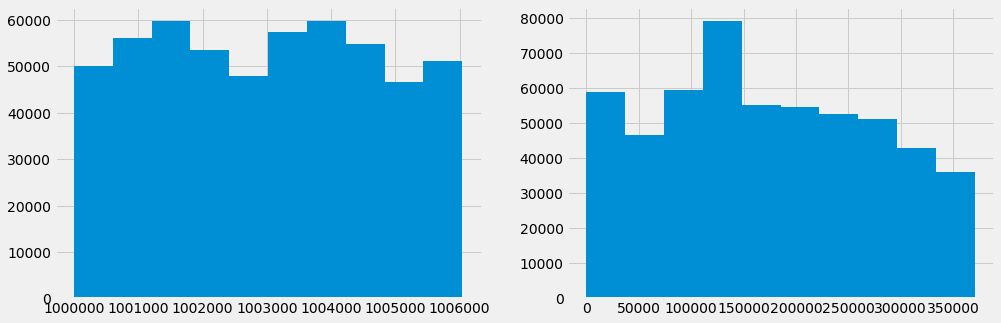

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[15, 5])

df['User_ID'].hist(ax=axes[0])
df['Product_ID'].apply(lambda x:int(x[1:])).hist(ax=axes[1])
plt.savefig("./PLOT/User_ID&Product_ID.png")

## Data Visualization

In [74]:
train = pd.read_csv("./Black-Friday-Hackaton/data/train.csv")
test = pd.read_csv("./Black-Friday-Hackaton/data/test.csv")

### Distribution of Purchase

/Users/heng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


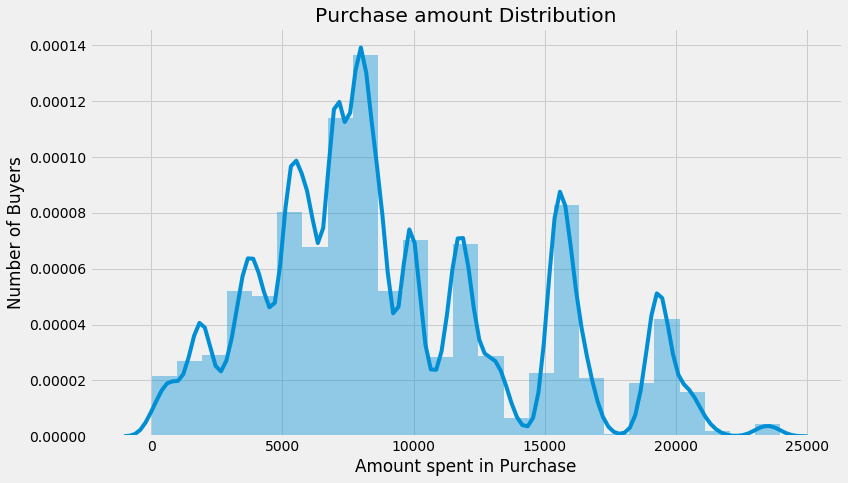

In [75]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.Purchase, bins = 25)
plt.xlabel('Amount spent in Purchase')
plt.ylabel('Number of Buyers')
plt.title('Purchase amount Distribution')
plt.savefig("./PLOT/Distribution of Purchase.png")

In [76]:
print ('Skew is:', train.Purchase.skew())
print('Kurtosis: %f' % train.Purchase.kurt())

Skew is: 0.6001400037087128
Kurtosis: -0.338378


### Distribution of Ocupation 

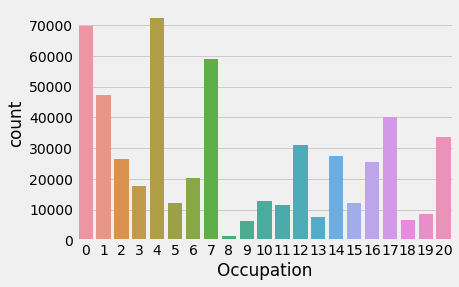

In [77]:
sns_plot = sns.countplot(train.Occupation)
sns_plot.figure.savefig('./PLOT/Occpation Distribution.png',  bbox_inches="tight")

In [78]:
train.Occupation.value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

### Distribution of  Marital_Status

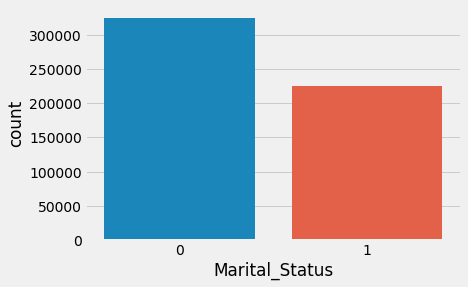

In [79]:
sns_plot = sns.countplot(train.Marital_Status)
sns_plot.figure.savefig("./PLOT/Marital Status.png",  bbox_inches="tight")

In [80]:
train.Marital_Status.value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

### Distribution of Product_Category_1

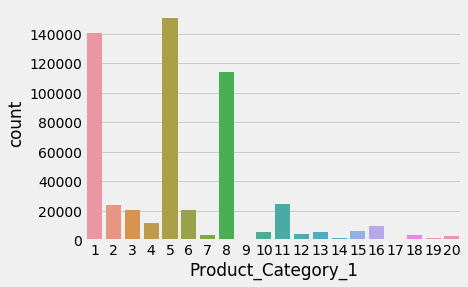

In [81]:
sns_plot = sns.countplot(train.Product_Category_1)
sns_plot.figure.savefig("./PLOT/Category_1 distribution.png",  bbox_inches="tight")

In [82]:
train.Product_Category_1.value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

### Distribution of Product_Category_2

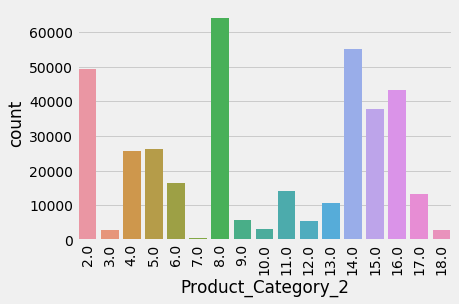

In [83]:
sns_plot = sns.countplot(train.Product_Category_2)
plt.xticks(rotation=90)
sns_plot.figure.savefig("./PLOT/Category_2 distribution.png",  bbox_inches="tight")

In [84]:
train.Product_Category_2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

### Distribution of Product_Category_3

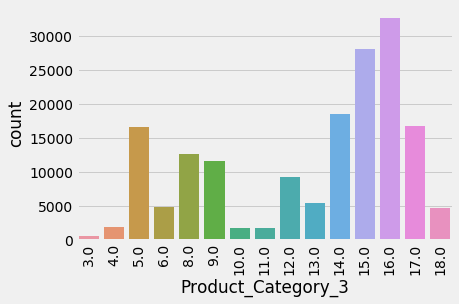

In [85]:
sns_plot = sns.countplot(train.Product_Category_3)
plt.xticks(rotation=90)
sns_plot.figure.savefig("./PLOT/Category_3 distribution.png",  bbox_inches="tight")

In [86]:
train.Product_Category_3.value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

### Correlation

In [87]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()

print (corr['Purchase'].sort_values(ascending=False)[:10], '\n')
print (corr['Purchase'].sort_values(ascending=False)[-10:])

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64 

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64


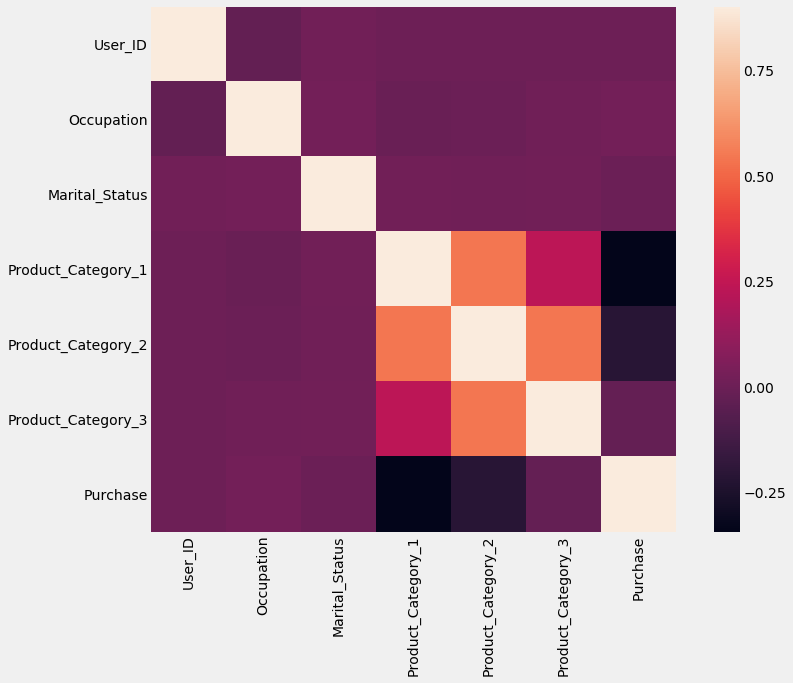

In [88]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns_plot = sns.heatmap(corr, vmax=.9, square=True)
sns_plot.figure.savefig("./PLOT/Correlation Matrix.png",  bbox_inches="tight")

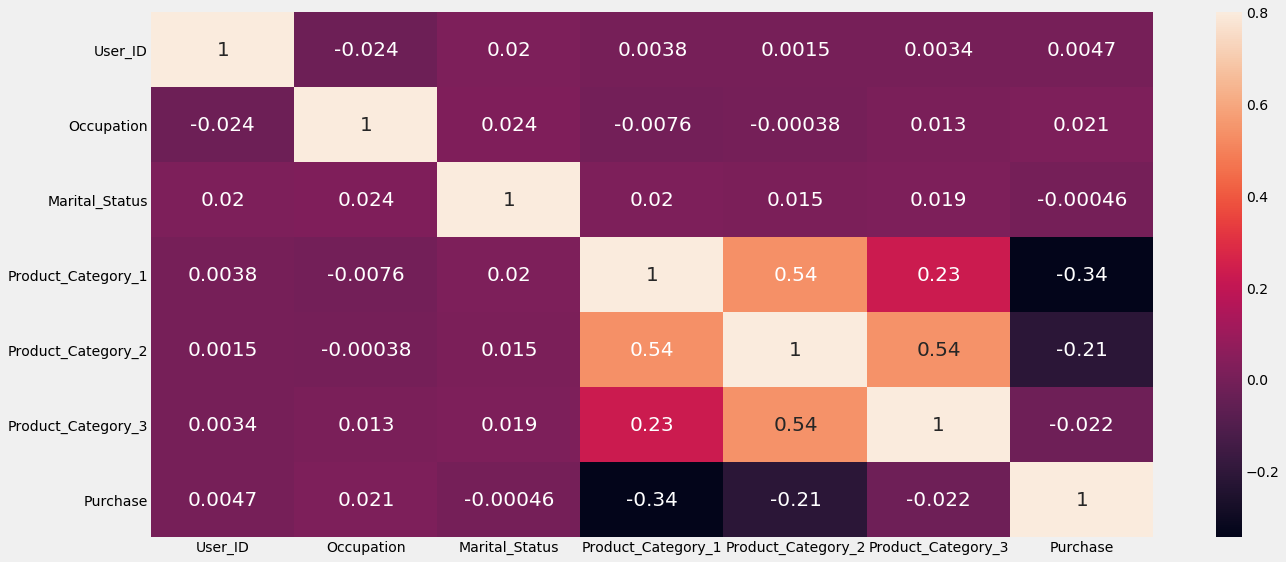

In [89]:
#correlation matrix
f, ax = plt.subplots(figsize=(20, 9))
sns_plot = sns.heatmap(corr, vmax=.8,annot_kws={'size': 20}, annot=True)
sns_plot.figure.savefig("./PLOT/Correlation Matrix.png",  bbox_inches="tight")

In [90]:
#Correlations Between Attributes
#Pearson’s Correlation
#Coefficient, that assumes a normal distribution of the attributes involved"""

s = corr.unstack()
#s.sort_values(kind="quicksort")
s

User_ID             User_ID               1.000000
                    Occupation           -0.023971
                    Marital_Status        0.020443
                    Product_Category_1    0.003825
                    Product_Category_2    0.001529
                    Product_Category_3    0.003419
                    Purchase              0.004716
Occupation          User_ID              -0.023971
                    Occupation            1.000000
                    Marital_Status        0.024280
                    Product_Category_1   -0.007618
                    Product_Category_2   -0.000384
                    Product_Category_3    0.013263
                    Purchase              0.020833
Marital_Status      User_ID               0.020443
                    Occupation            0.024280
                    Marital_Status        1.000000
                    Product_Category_1    0.019888
                    Product_Category_2    0.015138
                    Product_Cat

### Distribution of Gender

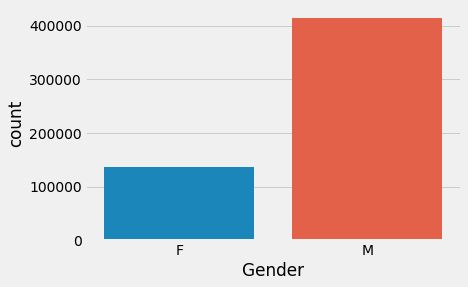

In [91]:
sns_plot = sns.countplot(train.Gender)
sns_plot.figure.savefig("./PLOT/Gender distribution.png",  bbox_inches="tight")

### Distribution of Age

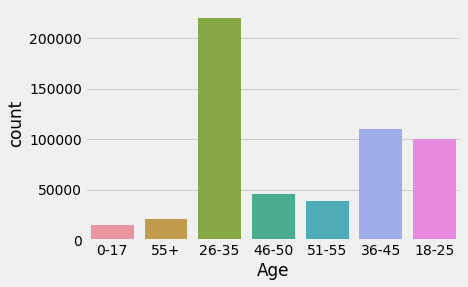

In [92]:
sns_plot = sns.countplot(train.Age)
sns_plot.figure.savefig("./PLOT/Age distribution.png",  bbox_inches="tight")

### Distribution of City_Category

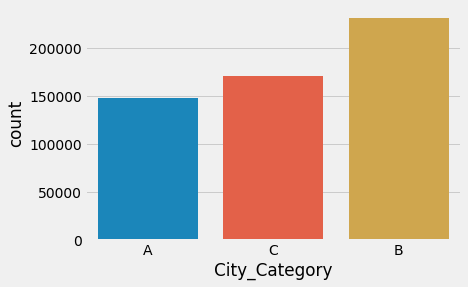

In [93]:
sns_plot = sns.countplot(train.City_Category)
sns_plot.figure.savefig("./PLOT/City distribution.png",  bbox_inches="tight")

### Distribution of Stay_In_Current_City_Years

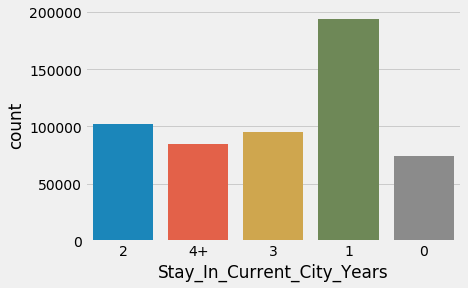

In [94]:
sns_plot = sns.countplot(train.Stay_In_Current_City_Years)
sns_plot.figure.savefig("./PLOT/Stay Years distribution.png",  bbox_inches="tight")

### Occupation and Purchase Analysis

#### MEAN

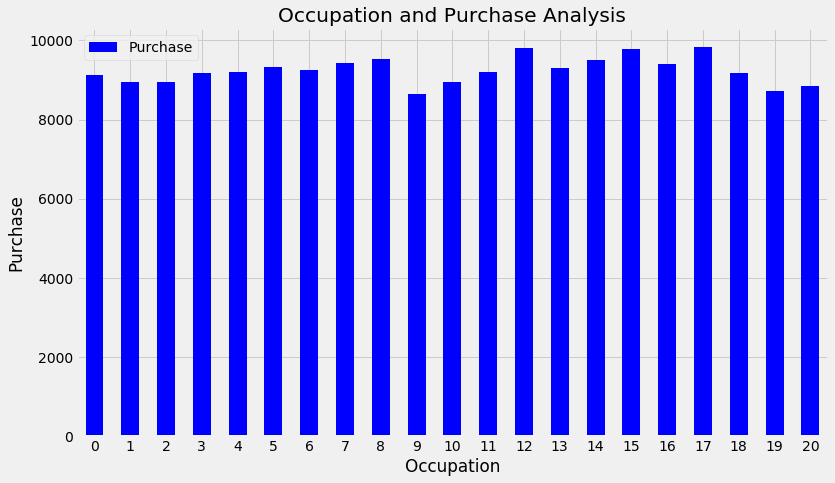

In [95]:
Occupation_pivot = \
train.pivot_table(index='Occupation', values="Purchase", aggfunc=np.mean)

Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.savefig("./PLOT/Occupation and Purchase Analysis MEAN.png",  bbox_inches="tight")
plt.show()

#### SUM

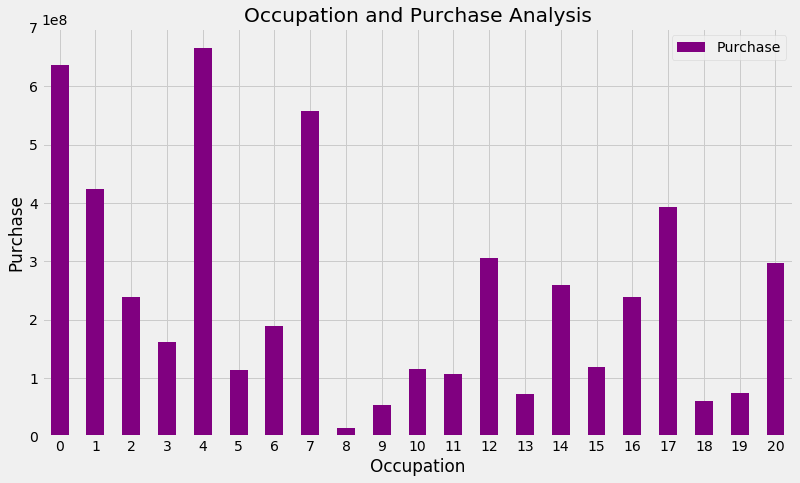

In [96]:
Occupation_pivot = \
train.pivot_table(index='Occupation', values="Purchase", aggfunc=np.sum)

Occupation_pivot.plot(kind='bar', color='purple',figsize=(12,7))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.savefig("./PLOT/Occupation and Purchase Analysis SUM.png",  bbox_inches="tight")
plt.show()

### Marital_Status and Purchase Analysis

#### MEAN

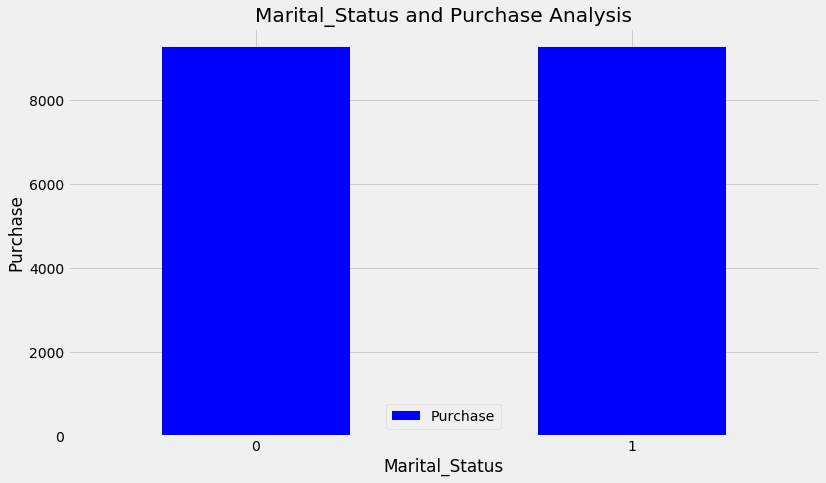

In [97]:
Marital_Status_pivot = \
train.pivot_table(index='Marital_Status', values="Purchase", aggfunc=np.mean)

Marital_Status_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Marital_Status")
plt.ylabel("Purchase")
plt.title("Marital_Status and Purchase Analysis")
plt.xticks(rotation=0)
plt.savefig("./PLOT/Marital and Purchase Analysis MEAN.png",  bbox_inches="tight")
plt.show()

#### SUM

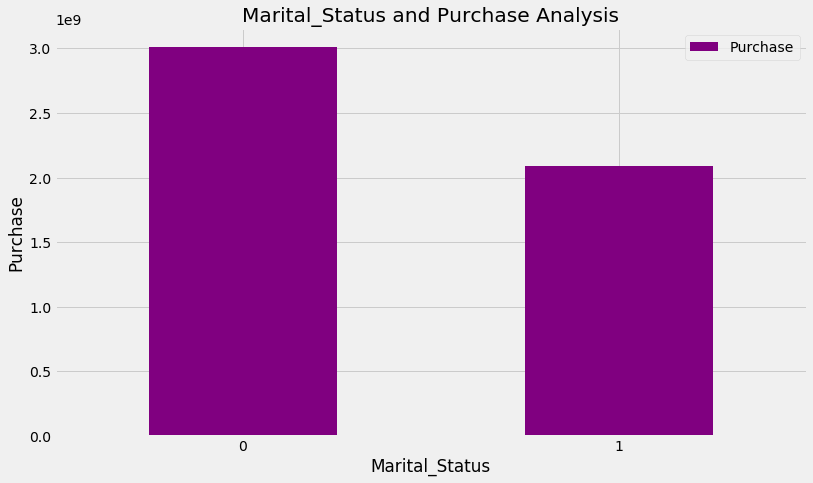

In [98]:
Marital_Status_pivot = \
train.pivot_table(index='Marital_Status', values="Purchase", aggfunc=np.sum)

Marital_Status_pivot.plot(kind='bar', color='purple',figsize=(12,7))
plt.xlabel("Marital_Status")
plt.ylabel("Purchase")
plt.title("Marital_Status and Purchase Analysis")
plt.xticks(rotation=0)
plt.savefig("./PLOT/Marital and Purchase Analysis SUM.png",  bbox_inches="tight")
plt.show()

### Product_Category_1 and Purchase Analysis

#### MEAN

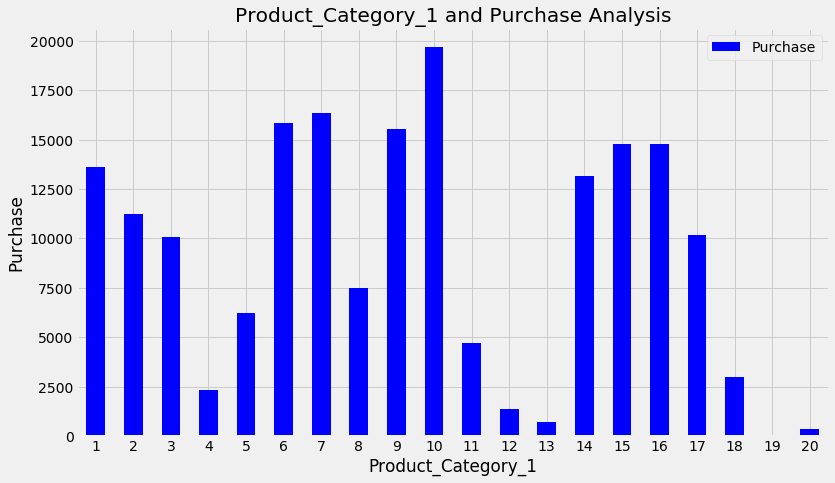

In [99]:
Product_category_1_pivot = \
train.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.mean)

Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis")
plt.xticks(rotation=0)
plt.savefig("./PLOT/C1 and Purchase Analysis MEAN.png",  bbox_inches="tight")
plt.show()

#### SUM

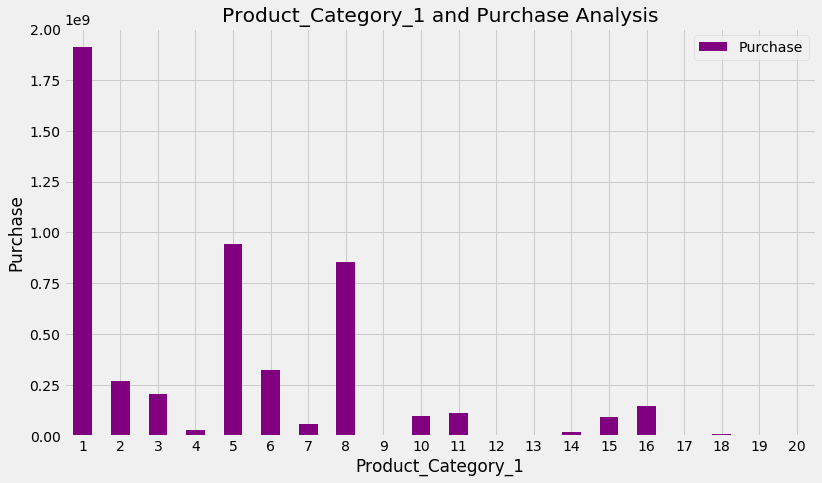

In [100]:
Product_category_1_pivot = \
train.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.sum)

Product_category_1_pivot.plot(kind='bar', color='purple',figsize=(12,7))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis")
plt.xticks(rotation=0)
plt.savefig("./PLOT/C1 and Purchase Analysis SUM.png",  bbox_inches="tight")
plt.show()

### Product_Category_2 and Purchase Analysis

#### MEAN

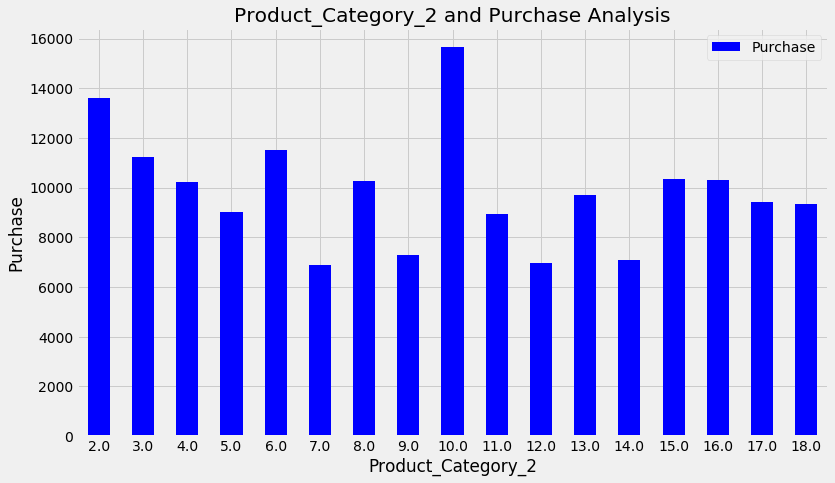

In [101]:
Product_category_2_pivot = \
train.pivot_table(index='Product_Category_2', values="Purchase", aggfunc=np.mean)

Product_category_2_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_2")
plt.ylabel("Purchase")
plt.title("Product_Category_2 and Purchase Analysis")
plt.xticks(rotation=0)
plt.savefig("./PLOT/C2 and Purchase Analysis MEAN.png",  bbox_inches="tight")
plt.show()

#### SUM

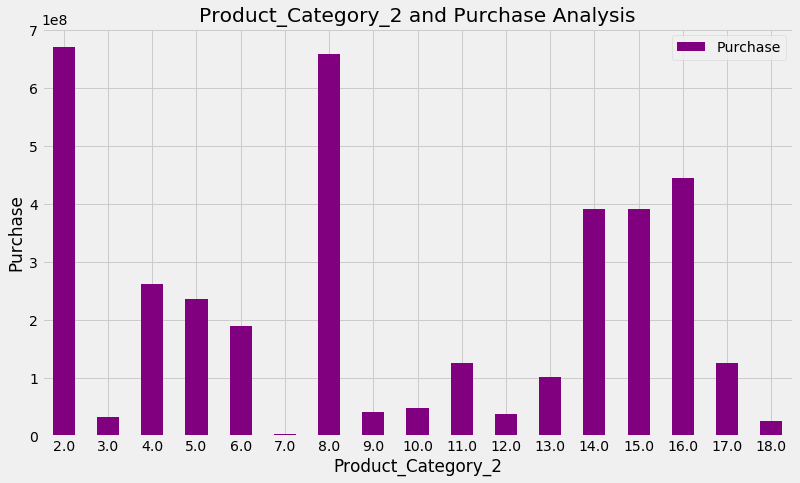

In [102]:
Product_category_2_pivot = \
train.pivot_table(index='Product_Category_2', values="Purchase", aggfunc=np.sum)

Product_category_2_pivot.plot(kind='bar', color='purple',figsize=(12,7))
plt.xlabel("Product_Category_2")
plt.ylabel("Purchase")
plt.title("Product_Category_2 and Purchase Analysis")
plt.xticks(rotation=0)
plt.savefig("./PLOT/C2 and Purchase Analysis SUM.png",  bbox_inches="tight")
plt.show()

### Product_Category_3 and Purchase Analysis

#### MEAN

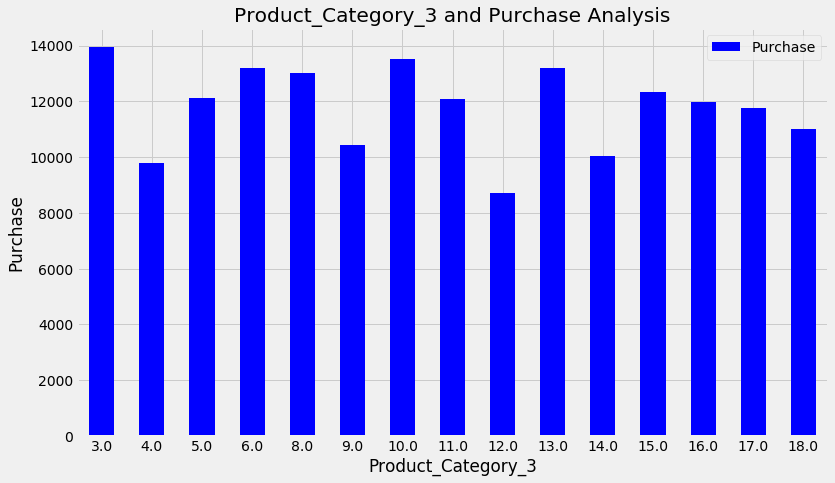

In [103]:
Product_category_3_pivot = \
train.pivot_table(index='Product_Category_3', values="Purchase", aggfunc=np.mean)

Product_category_3_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_3")
plt.ylabel("Purchase")
plt.title("Product_Category_3 and Purchase Analysis")
plt.xticks(rotation=0)
plt.savefig("./PLOT/C3 and Purchase Analysis MEAN.png",  bbox_inches="tight")
plt.show()

#### SUM

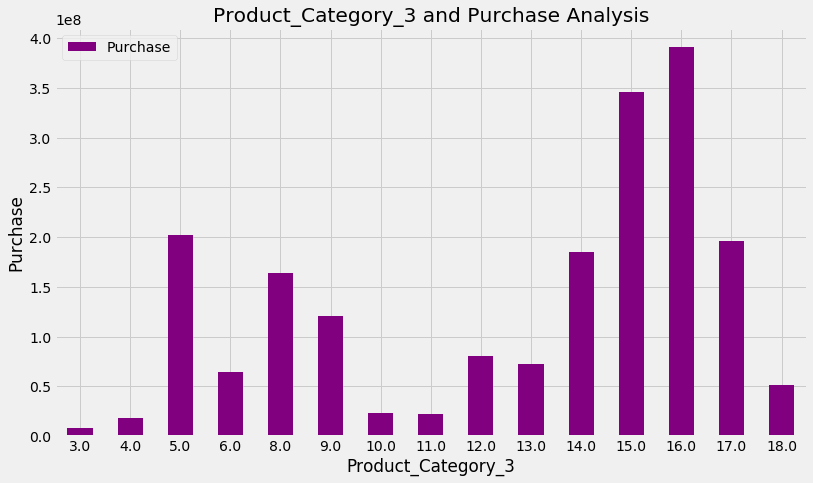

In [104]:
Product_category_3_pivot = \
train.pivot_table(index='Product_Category_3', values="Purchase", aggfunc=np.sum)

Product_category_3_pivot.plot(kind='bar', color='purple',figsize=(12,7))
plt.xlabel("Product_Category_3")
plt.ylabel("Purchase")
plt.title("Product_Category_3 and Purchase Analysis")
plt.xticks(rotation=0)
plt.savefig("./PLOT/C3 and Purchase Analysis SUM.png",  bbox_inches="tight")
plt.show()

### Gender and Purchase Analysis

#### MEAN

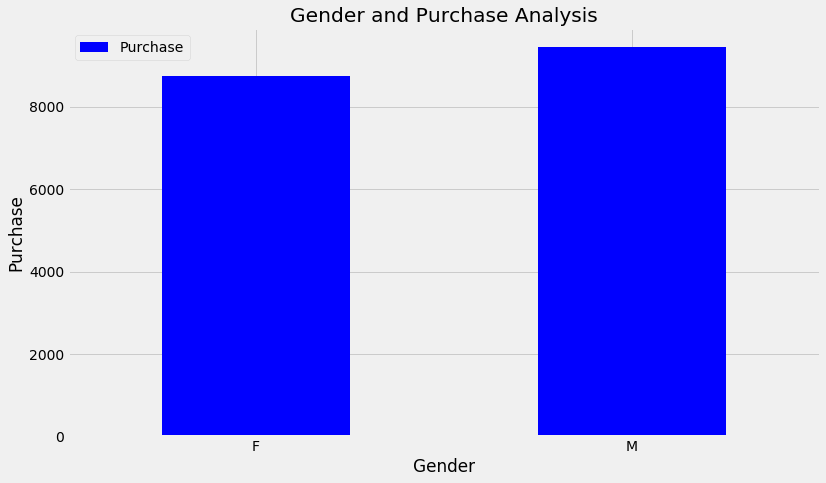

In [105]:
G_P_pivot = \
train.pivot_table(index='Gender', values="Purchase", aggfunc=np.mean)

G_P_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.savefig("./PLOT/Gender and Purchase Analysis MEAN.png",  bbox_inches="tight")
plt.show()

#### SUM

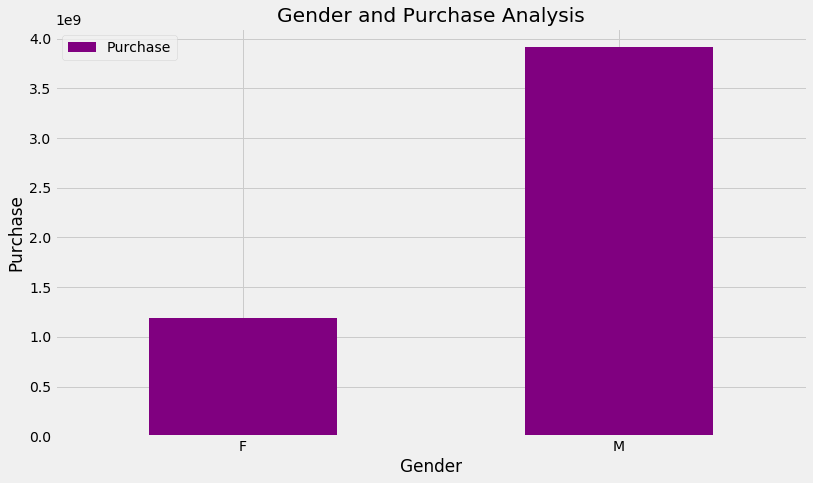

In [106]:
G_P_pivot = \
train.pivot_table(index='Gender', values="Purchase", aggfunc=np.sum)

G_P_pivot.plot(kind='bar', color='purple',figsize=(12,7))
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.savefig("./PLOT/Gender and Purchase Analysis SUM.png",  bbox_inches="tight")
plt.show()

### Age and Purchase Analysis

#### MEAN

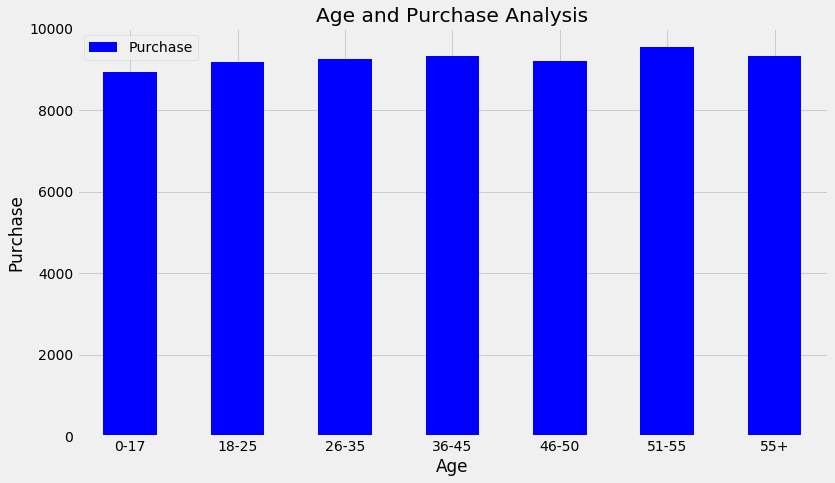

In [107]:
A_P_pivot = \
train.pivot_table(index='Age', values="Purchase", aggfunc=np.mean)

A_P_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.savefig("./PLOT/Age and Purchase Analysis MEAN.png",  bbox_inches="tight")
plt.show()

#### SUM

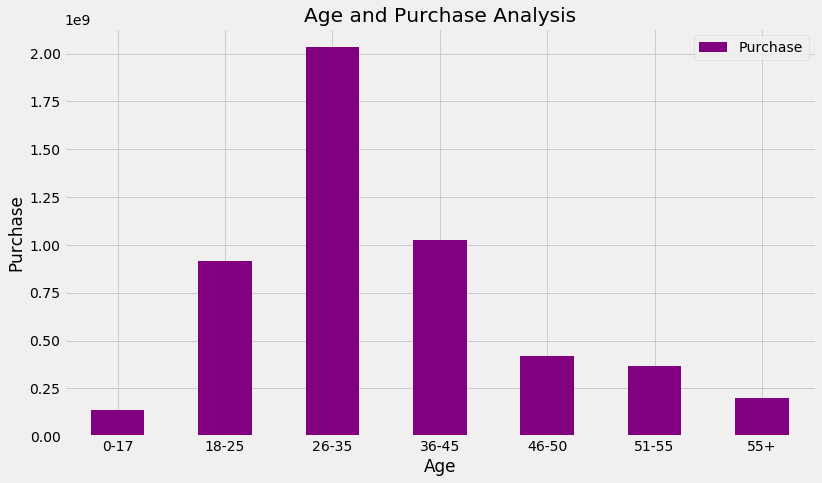

In [108]:
A_P_pivot = \
train.pivot_table(index='Age', values="Purchase", aggfunc=np.sum)

A_P_pivot.plot(kind='bar', color='purple',figsize=(12,7))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.savefig("./PLOT/Gender and Purchase Analysis SUM.png",  bbox_inches="tight")
plt.show()

### City_Category and Purchase Analysis

#### MEAN

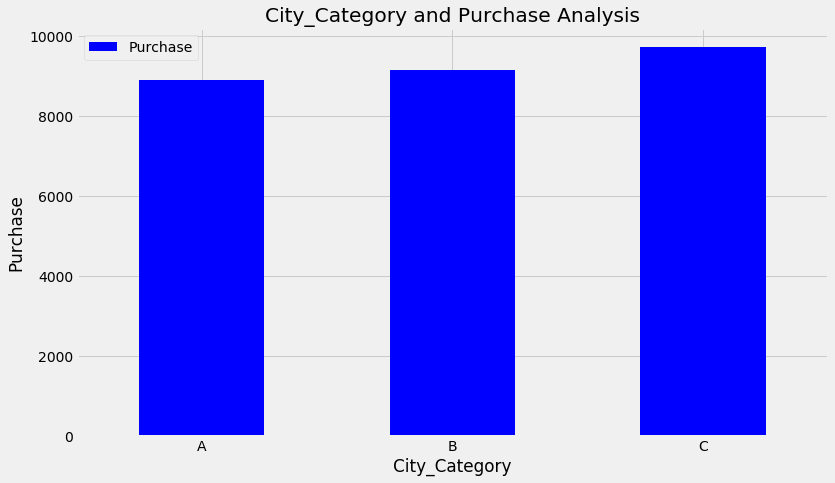

In [109]:
C_P_pivot = \
train.pivot_table(index='City_Category', values="Purchase", aggfunc=np.mean)

C_P_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("City_Category")
plt.ylabel("Purchase")
plt.title("City_Category and Purchase Analysis")
plt.xticks(rotation=0)
plt.savefig("./PLOT/City and Purchase Analysis MEAN.png",  bbox_inches="tight")
plt.show()

#### SUM

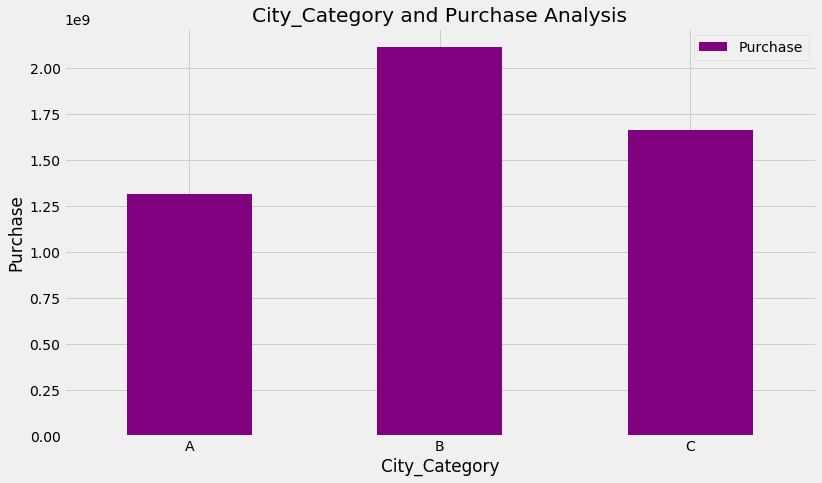

In [110]:
C_P_pivot = \
train.pivot_table(index='City_Category', values="Purchase", aggfunc=np.sum)

C_P_pivot.plot(kind='bar', color='purple',figsize=(12,7))
plt.xlabel("City_Category")
plt.ylabel("Purchase")
plt.title("City_Category and Purchase Analysis")
plt.xticks(rotation=0)
plt.savefig("./PLOT/City and Purchase Analysis SUM.png",  bbox_inches="tight")
plt.show()

### Stay_in_Current_City_Years and Purchase Analysis

#### MEAN

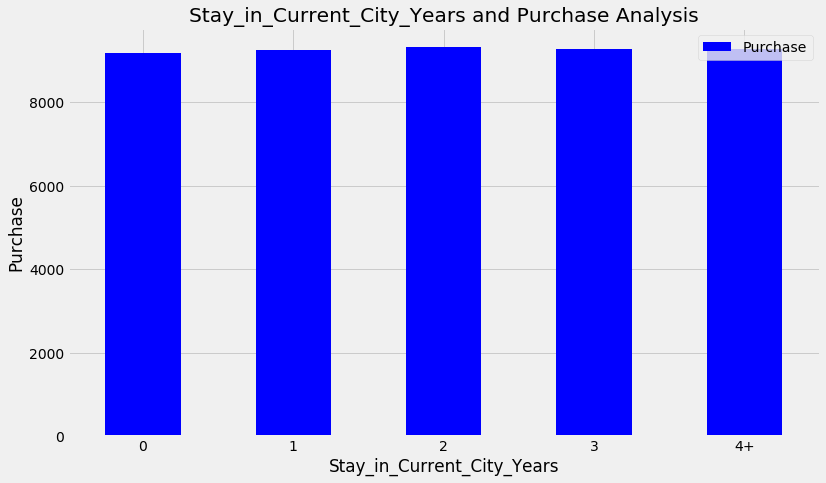

In [111]:
S_P_pivot = \
train.pivot_table(index='Stay_In_Current_City_Years', values="Purchase", aggfunc=np.mean)

S_P_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Stay_in_Current_City_Years")
plt.ylabel("Purchase")
plt.title("Stay_in_Current_City_Years and Purchase Analysis")
plt.xticks(rotation=0)
plt.savefig("./PLOT/City Years and Purchase Analysis MEAN.png",  bbox_inches="tight")
plt.show()

#### SUM

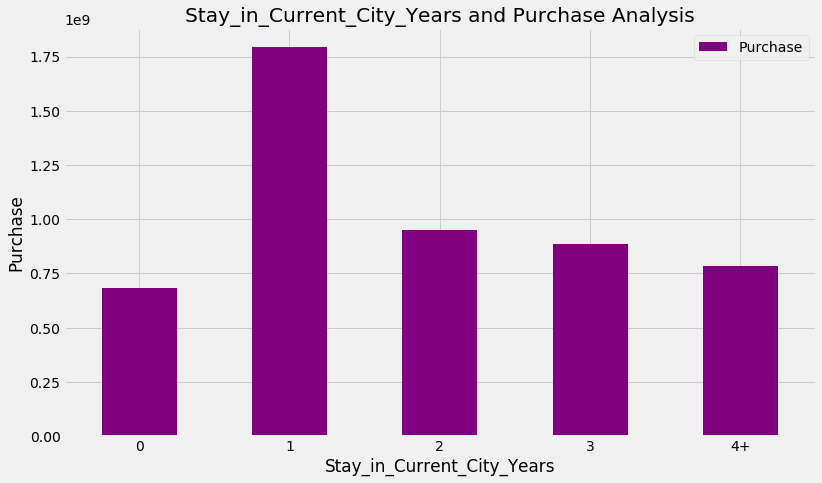

In [112]:
S_P_pivot = \
train.pivot_table(index='Stay_In_Current_City_Years', values="Purchase", aggfunc=np.sum)

S_P_pivot.plot(kind='bar', color='purple',figsize=(12,7))
plt.xlabel("Stay_in_Current_City_Years")
plt.ylabel("Purchase")
plt.title("Stay_in_Current_City_Years and Purchase Analysis")
plt.xticks(rotation=0)
plt.savefig("./PLOT/City Years and Purchase Analysis SUM.png",  bbox_inches="tight")
plt.show()

## Data Pre-processing

In [157]:
# Join Train and Test Dataset
train['source']='train'
test['source']='test'

data = pd.concat([train,test], ignore_index = True, sort = False)

print(train.shape, test.shape, data.shape)

(550068, 13) (233599, 12) (783667, 13)


### Processing Category_2

In [158]:
data["Product_Category_2"]= \
data["Product_Category_2"].fillna(-2.0).astype("float")

In [159]:
data.Product_Category_2.value_counts().sort_index()

-2.0     245982
 2.0      70498
 3.0       4123
 4.0      36705
 5.0      37165
 6.0      23575
 7.0        854
 8.0      91317
 9.0       8177
 10.0      4420
 11.0     20230
 12.0      7801
 13.0     15054
 14.0     78834
 15.0     54114
 16.0     61687
 17.0     19104
 18.0      4027
Name: Product_Category_2, dtype: int64

### Processing Category_3

In [160]:
data["Product_Category_3"]= \
data["Product_Category_3"].fillna(-2.0).astype("float")

In [161]:
data.Product_Category_3.value_counts().sort_index()

-2.0     545809
 3.0        878
 4.0       2691
 5.0      23799
 6.0       6888
 8.0      17861
 9.0      16532
 10.0      2501
 11.0      2585
 12.0     13115
 13.0      7849
 14.0     26283
 15.0     39968
 16.0     46469
 17.0     23818
 18.0      6621
Name: Product_Category_3, dtype: int64

### Removing Product_Category_1 group 19 and 20 from Train

In [162]:
data.shape

(783667, 13)

In [163]:
#Get index of all columns with product_category_1 equal 19 or 20 from train
condition = data.index[(data.Product_Category_1.isin([19,20])) & (data.source == "train")]
data = data.drop(condition)

In [164]:
data.shape

(779514, 13)

### Frequency Analysis

In [165]:
#Filter categorical variables and get dataframe will all strings columns names except Item_identfier and outlet_identifier
category_cols = data.select_dtypes(include=['object']).columns.drop(["source"])
#Print frequency of categories
for col in category_cols:
    #Number of times each value appears in the column
    frequency = data[col].value_counts()
    print("\nThis is the frequency distribution for " + col + ":")
    print(frequency)


This is the frequency distribution for Product_ID:
P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
P00057642    2079
P00184942    2066
P00058042    2014
P00237542    1999
P00145042    1991
P00117942    1985
P00110942    1976
P00059442    1949
P00010742    1922
P00255842    1914
P00110842    1834
P00220442    1833
P00051442    1794
P00117442    1785
P00102642    1782
P00242742    1774
P00148642    1758
P00031042    1737
P00278642    1735
P00080342    1719
P00028842    1713
P00034742    1690
P00251242    1682
P00114942    1673
P00000142    1636
             ... 
P00353742       1
P00107942       1
P00211742       1
P00307242       1
P00314842       1
P00062442       1
P00106242       1
P00063442       1
P00057842       1
P00126342       1
P00074842       1
P00348142       1
P00091542       1
P00064542       1
P00056642       1
P00013542       1
P00340742       1
P00105742       1
P00353042       1
P00077542       1
P00295642       1
P00135942   

## Feature Engineering

### Converting Gender to binary

In [166]:
#Turn gender binary
gender_dict = {'F':0, 'M':1}
data["Gender"] = data["Gender"].apply(lambda line: gender_dict[line])

data["Gender"].value_counts()

1    587052
0    192462
Name: Gender, dtype: int64

### Converting Age to numeric values

In [167]:
# Giving Age Numerical values
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
data["Age"] = data["Age"].apply(lambda line: age_dict[line])

data["Age"].value_counts()

2    311554
3    155898
1    141209
4     64902
5     54450
6     30316
0     21185
Name: Age, dtype: int64

### Converting city_category to binary

In [169]:
city_dict = {'A':0, 'B':1, 'C':2}
data["City_Category"] = data["City_Category"].apply(lambda line: city_dict[line])

data["City_Category"].value_counts()

1    328524
2    241487
0    209503
Name: City_Category, dtype: int64

### Converting Stay_In_Current_City_Years to binary

In [170]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#New variable for outlet
data['Stay_In_Current_City_Years'] = le.fit_transform(data['Stay_In_Current_City_Years'])
    
#Dummy Variables:
data = pd.get_dummies(data, columns=['Stay_In_Current_City_Years'])

data.dtypes

User_ID                           int64
Product_ID                       object
Gender                            int64
Age                               int64
Occupation                        int64
City_Category                     int64
Marital_Status                    int64
Product_Category_1                int64
Product_Category_2              float64
Product_Category_3              float64
Purchase                        float64
source                           object
Stay_In_Current_City_Years_0      uint8
Stay_In_Current_City_Years_1      uint8
Stay_In_Current_City_Years_2      uint8
Stay_In_Current_City_Years_3      uint8
Stay_In_Current_City_Years_4      uint8
dtype: object

### Function to create count features

In [171]:
# feature representing the count of each user
def getCountVar(compute_df, count_df, var_name):
    grouped_df = count_df.groupby(var_name)
    count_dict = {}
    for name, group in grouped_df:
        count_dict[name] = group.shape[0]

    count_list = []
    for index, row in compute_df.iterrows():
        name = row[var_name]
        count_list.append(count_dict.get(name, 0))
    return count_list

In [172]:
#data["User_ID_Count"]  = getCountVar(data, data, "User_ID")
data["Age_Count"]  =getCountVar(data, data, "Age")
data["Occupation_Count"]  =getCountVar(data, data, "Occupation")
data["Product_Category_1_Count"]  =getCountVar(data, data,"Product_Category_1")
data["Product_Category_2_Count"]  =getCountVar(data, data, "Product_Category_2")
data["Product_Category_3_Count"]  =getCountVar(data, data,"Product_Category_3")
data["Product_ID_Count"]  =getCountVar(data, data, "Product_ID")

### Exporting Data

In [173]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

/Users/heng/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


FileNotFoundError: [Errno 2] No such file or directory: 'data/train_modified.csv'

### Start to Train MY_AWESOME Model

In [ ]:
train_df = pd.read_csv('data/train_modified.csv')
test_df = pd.read_csv('data/test_modified.csv')

### This Function is for any kind of ML model to fit

In [ ]:
#Define target and ID columns:
target = 'Purchase'
IDcol = ['User_ID','Product_ID']
from sklearn import cross_validation, metrics


def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

### Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)

predictors = train_df.columns.drop(['Purchase','Product_ID','User_ID'])
modelfit(LR, train_df, test_df, predictors, target, IDcol, 'LR.csv')

coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

### Ridge Regression Model

In [ ]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05,normalize=True)
modelfit(RR, train_df, test_df, predictors, target, IDcol, 'RR.csv')

coef2 = pd.Series(RR.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

### Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train_df, test_df, predictors, target, IDcol, 'DT.csv')

coef3 = pd.Series(DT.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

### Random Forrest Model

In [ ]:
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, train_df, test_df, predictors, target, IDcol, 'RF.csv')

coef4 = pd.Series(RF.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

### XGBoost Model

In [ ]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_df[predictors], train_df[target], early_stopping_rounds=5, 
             eval_set=[(test_df[predictors], test_df[target])], verbose=False)

In [ ]:
#Predict training set:
train_df_predictions = my_model.predict(train_df[predictors])

# make predictions
predictions = my_model.predict(test_df[predictors])

In [ ]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions)))

In [ ]:
IDcol.append(target)
submission = pd.DataFrame({ x: test_df[x] for x in IDcol})
submission.to_csv("XGBoos.csv", index=False)